In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix


In [17]:
my_data_dir ='C:/Users/PRAMOD/Desktop/Defect/casting_data/'
train_path = 'C:/Users/PRAMOD/Desktop/Defect/casting_data/train/'
test_path = 'C:/Users/PRAMOD/Desktop/Defect/casting_data/test/'

image_shape = (300,300,1)
batch_size = 32 #according your model and your choise

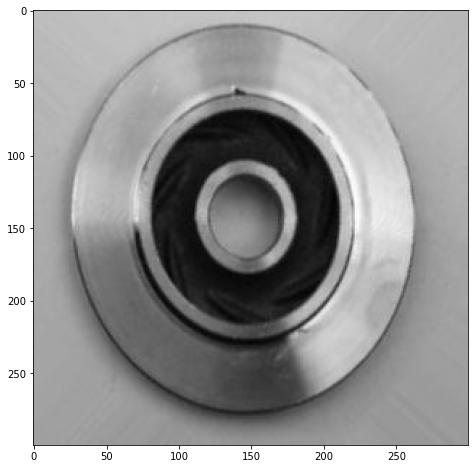

In [18]:
# view some images
img = plt.imread('C:/Users/PRAMOD/Desktop/Defect/casting_data/train/def_front/cast_def_0_1001.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [19]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it)

In [20]:
#we using keras inbuild function to ImageDataGenerator so we donnot need to lable all images into 0 and 1 it automatic create it and batch also during trainng 
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [21]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [23]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [25]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 444s 2s/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 2/20
208/208 [==============================] - 479s 2s/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.0180 - val_accuracy: 0.9944
Epoch 3/20
208/208 [==============================] - 482s 2s/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0307 - val_accuracy: 0.9874
Epoch 4/20
208/208 [==============================] - 3454s 17s/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0517 - val_accuracy: 0.9776


In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

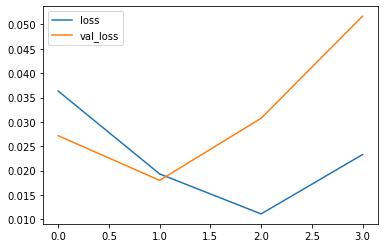

In [27]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

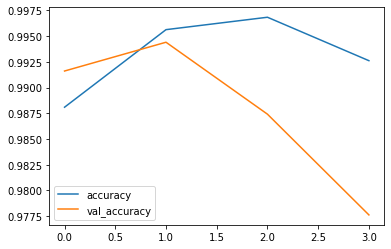

In [28]:
losses[['accuracy','val_accuracy']].plot()

In [29]:
#first we will find predict probability
pred_probability = model.predict_generator(test_set)

In [30]:
#here it's true label for test set
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

In [32]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       453
           1       1.00      0.94      0.97       262

    accuracy                           0.98       715
   macro avg       0.98      0.97      0.98       715
weighted avg       0.98      0.98      0.98       715



<AxesSubplot:>

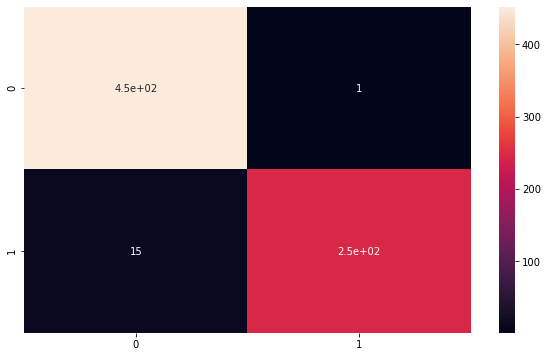

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

In [34]:
test_path

'C:/Users/PRAMOD/Desktop/Defect/casting_data/test/'

In [35]:
img = cv2.imread(test_path+'ok_front/cast_ok_0_1020.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

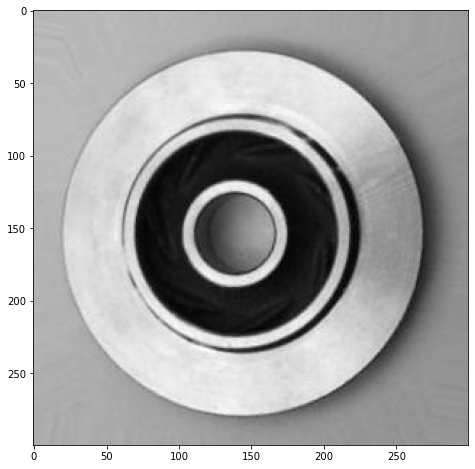

In [36]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

ok_front


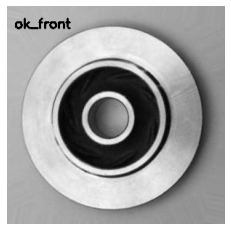

In [37]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

In [38]:
img1 = cv2.imread(test_path+'def_front/cast_def_0_1134.jpeg',0)
img1 = img1/255
pred_img1 =img1.copy()

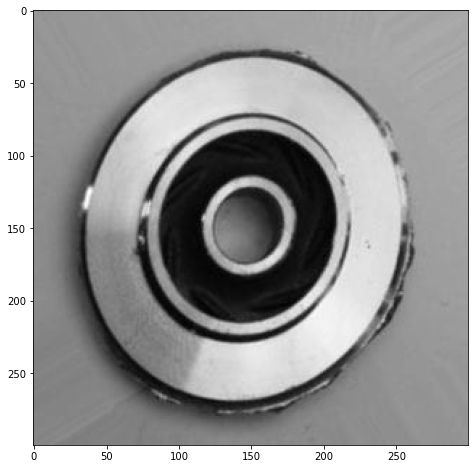

In [39]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

In [40]:
model.predict_proba(img.reshape(1,300,300,1))

array([[0.9964732]], dtype=float32)

def_front


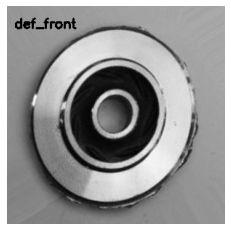

In [41]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

In [42]:
model.save('inspection_of_casting_products.h5')